<a href="https://colab.research.google.com/github/rahulakkasali/APPLICTION_OF_E-X-EXPECTED_VALUE/blob/main/E(X).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
eth_data = yf.download('ETH-USD', start='2023-01-01', end='2025-01-01')

/tmp/ipython-input-3705216595.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth_data = yf.download('ETH-USD', start='2023-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [ ]:

df=eth_data
df.head()

Price,Close,High,Low,Open,Volume,MA_short,MA_long,Signal_MA
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,,,
Date,,,,,,,,
2023-01-01,1200.964844,1203.475342,1192.885376,1196.713623,2399674550,NaN,NaN,0
2023-01-02,1214.656616,1219.860596,1195.214966,1201.103271,3765758498,NaN,NaN,0
2023-01-03,1214.778809,1219.095337,1207.491577,1214.744019,3392972131,NaN,NaN,0
2023-01-04,1256.526611,1264.807495,1213.168823,1214.718628,6404416893,NaN,NaN,0
2023-01-05,1250.438599,1258.571533,1245.173096,1256.484619,4001786456,NaN,NaN,0


In [ ]:
def moving_average_crossover(df, short_window=10, long_window=50):
    df['MA_short'] = df['Close'].rolling(window=short_window).mean()
    df['MA_long'] = df['Close'].rolling(window=long_window).mean()
    df['Signal_MA'] = 0
    df.loc[df.iloc[short_window:].index, 'Signal_MA'] = np.where(
        df.iloc[short_window:]['MA_short'] > df.iloc[short_window:]['MA_long'], 1, -1)
    return df

In [35]:
eth_data_crossover= moving_average_crossover(eth_data)


In [38]:
display(eth_data_crossover)

Price,Close,High,Low,Open,Volume,MA_short,MA_long,Signal_MA
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,,,
Date,,,,,,,,
2023-01-01,1200.964844,1203.475342,1192.885376,1196.713623,2399674550,NaN,NaN,0
2023-01-02,1214.656616,1219.860596,1195.214966,1201.103271,3765758498,NaN,NaN,0
2023-01-03,1214.778809,1219.095337,1207.491577,1214.744019,3392972131,NaN,NaN,0
2023-01-04,1256.526611,1264.807495,1213.168823,1214.718628,6404416893,NaN,NaN,0
2023-01-05,1250.438599,1258.571533,1245.173096,1256.484619,4001786456,NaN,NaN,0
...,...,...,...,...,...,...,...,...
2024-12-27,3328.916992,3436.710693,3302.575684,3331.053711,24091627403,NaN,NaN,-1
2024-12-28,3397.902344,3419.920166,3318.033936,3328.774658,14305648523,NaN,NaN,-1


In [40]:
eth_data_crossover.describe()

Price,Close,High,Low,Open,Volume,MA_short,MA_long,Signal_MA
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,,,
count,731.000000,731.000000,731.000000,731.000000,7.310000e+02,0.0,0.0,731.000000
mean,2420.897072,2470.367148,2365.350447,2417.990406,1.333297e+10,NaN,NaN,-0.986320
std,738.200234,761.483960,711.295830,738.735322,1.005866e+10,NaN,NaN,0.116238
min,1200.964844,1203.475342,1192.885376,1196.713623,2.081626e+09,NaN,NaN,-1.000000
25%,1807.390259,1835.869568,1780.568542,1805.646423,6.804868e+09,NaN,NaN,-1.000000
50%,2281.471191,2322.021484,2225.081055,2274.437744,1.055808e+10,NaN,NaN,-1.000000
75%,3089.519409,3158.157837,3018.964478,3080.323242,1.613200e+10,NaN,NaN,-1.000000
max,4066.445068,4106.955566,3974.176270,4066.690430,6.766813e+10,NaN,NaN,0.000000


In [43]:
def rsi_mean_reversion(df, window=14, rsi_buy=30, rsi_sell=70):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).fillna(0)
    loss = -delta.where(delta < 0, 0).fillna(0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['Signal_RSI'] = 0
    df.loc[df['RSI'] < rsi_buy, 'Signal_RSI'] = 1
    df.loc[df['RSI'] > rsi_sell, 'Signal_RSI'] = -1
    return df


In [45]:
eth_data_rsi = rsi_mean_reversion(df)


In [47]:
def backtest_strategy(df, signal_column):
    df = df.copy()
    df['Position'] = df[signal_column].shift()  # shift to avoid lookahead bias
    df['Returns'] = df['Close'].pct_change()
    df['Strategy_Returns'] = df['Position'] * df['Returns']
    df['Cumulative_Return'] = (1 + df['Strategy_Returns']).cumprod() - 1
    total_return = df['Cumulative_Return'].iloc[-1]
    return df, total_return


In [49]:
eth_data_crossover, total_return_ma = backtest_strategy(eth_data, 'Signal_MA')
eth_data_rsi, total_return_rsi = backtest_strategy(eth_data, 'Signal_RSI')
print(f"MA Crossover Total Return: {total_return_ma:.2%}")
print(f"RSI Mean Reversion Total Return: {total_return_rsi:.2%}")


MA Crossover Total Return: -78.07%
RSI Mean Reversion Total Return: 0.00%


In [50]:
expected_return_ma = eth_data_crossover['Strategy_Returns'].mean()
expected_return_rsi = eth_data_rsi['Strategy_Returns'].mean()
print(f"Expected daily return MA: {expected_return_ma:.5f}")
print(f"Expected daily return RSI: {expected_return_rsi:.5f}")


Expected daily return MA: -0.00163
Expected daily return RSI: 0.00000


In [51]:
annualized_return_ma = expected_return_ma * 252
annualized_return_rsi = expected_return_rsi * 252
print(f"Annualized Expected return MA: {annualized_return_ma:.2%}")
print(f"Annualized Expected return RSI: {annualized_return_rsi:.2%}")


Annualized Expected return MA: -41.11%
Annualized Expected return RSI: 0.00%


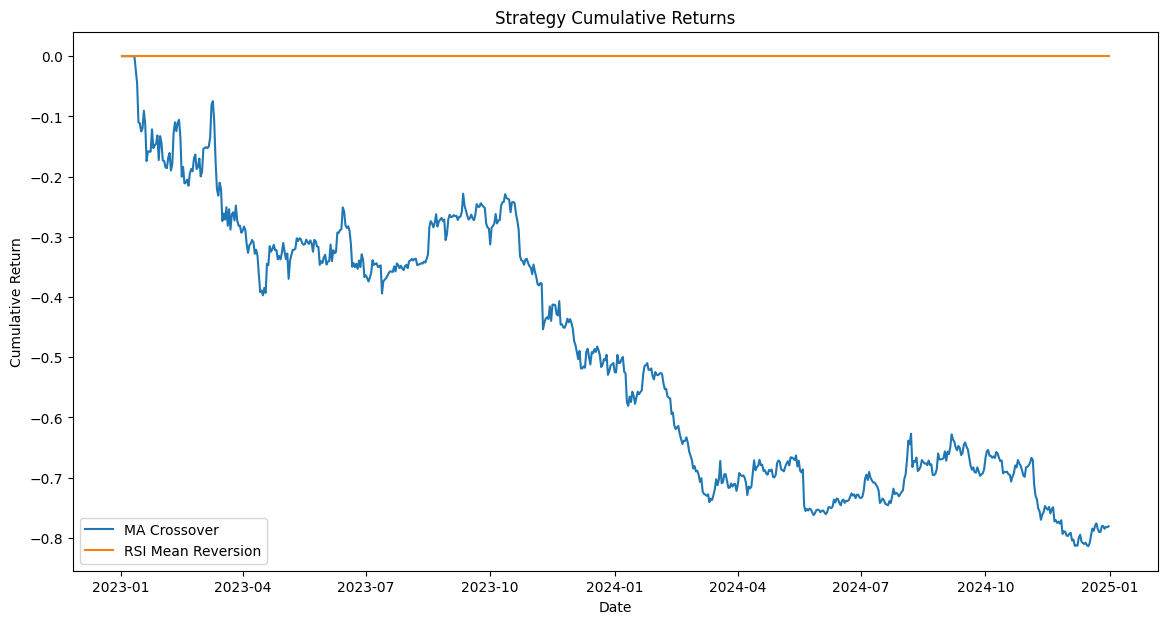

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(eth_data_crossover['Cumulative_Return'], label='MA Crossover')
plt.plot(eth_data_rsi['Cumulative_Return'], label='RSI Mean Reversion')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Strategy Cumulative Returns')
plt.legend()
plt.show()
